In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
import json
from functions import *

In [2]:
dat = pd.read_csv("../data/jj_21.csv")
dat["Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]= "J&J"

dat1 = pd.read_csv("../data/pfizer_21_1.csv")
dat1_2 = pd.read_csv("../data/pfizer_21_2.csv")

dat2 = pd.read_csv("../data/astra_21_1.csv")
dat2_2 = pd.read_csv("../data/astra_21_2.csv")

dat3 = pd.read_csv("../data/moderna_21.csv")
dat3["Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])"]= "MODERNA"

dat= pd.concat([dat,dat1,dat1_2,dat2,dat2_2,dat3])
dat["EV Gateway Receipt Date"] = pd.to_datetime(dat["EV Gateway Receipt Date"],format='%Y-%m-%d')
#dat=dat.set_index("EV Gateway Receipt Date")
dat["num"]=1
dat

,﻿EU Local Number,Report Type,EV Gateway Receipt Date,Primary Source Qualification,Primary Source Country for Regulatory Purposes,Literature Reference,Patient Age Group,Patient Age Group (as per reporter),Parent Child Report,Patient Sex,Reaction List PT (Duration – Outcome - Seriousness Criteria),Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),Concomitant/Not Administered Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route]),ICSR Form,EU Local Number,num
0,EU-EC-10008723600,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Male,"Ageusia (3d - Recovered/Resolved - ),<BR><BR>A...",J&J,[PARACETAMOL] (C - Premedication - n/a - [n/a ...,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
1,EU-EC-10008725968,Spontaneous,2021-05-21,Non Healthcare Professional,European Economic Area,Not available,65-85 Years,Not Specified,No,Female,"Chills (n/a - Recovered/Resolved - ),<BR><BR>P...",J&J,[ACETYLSALICYLIC ACID] (C - n/a - n/a - [n/a -...,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
2,EU-EC-10008726043,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Female,"Arthralgia (n/a - Recovering/Resolving - ),<BR...",J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
3,EU-EC-10008726171,Spontaneous,2021-05-21,Non Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Female,Pain in extremity (n/a - Recovered/Resolved - ...,J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
4,EU-EC-10008726191,Spontaneous,2021-05-21,Healthcare Professional,European Economic Area,Not available,18-64 Years,Not Specified,No,Male,Rash (n/a - Not Recovered/Not Resolved - ),J&J,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29611,EU-EC-10007328533,Spontaneous,2021-01-11,Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Female,Anaphylactic reaction (n/a - Unknown - Other M...,MODERNA,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
29612,EU-EC-10007328534,Spontaneous,2021-01-11,Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Male,Abdominal discomfort (n/a - Recovered/Resolved...,MODERNA,"[DESVENLAFAXINE, DESVENLAFAXINE SUCCINATE MONO...","<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
29613,EU-EC-10007328536,Spontaneous,2021-01-11,Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Female,Anaphylactic reaction (1d - Recovered/Resolved...,MODERNA,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1
29614,EU-EC-10007330615,Spontaneous,2021-01-11,Non Healthcare Professional,Non European Economic Area,Not available,18-64 Years,Not Specified,No,Female,"Headache (n/a - Unknown - ),<BR><BR>Injection ...",MODERNA,Not reported,"<a target=""_blank"" href=""https://bi.ema.europa...",NaN,1


In [3]:
dat_filtered1 = dat[dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("ospitalisation|Disabling|Death|Fatal",na=False)]
#dat_filtered1
e,n = buildNetwork(dat_filtered1)

['Contusion', 'Hemiparesis', 'Acute myocardial infarction', 'Epistaxis', 'Sudden death', 'Dysphagia', 'Cerebral infarction', 'Cardiac failure', 'Feeling cold', 'Musculoskeletal stiffness', 'Cerebral venous sinus thrombosis', 'Unresponsive to stimuli', 'Dysarthria', 'Visual impairment', 'Feeling hot', 'Aphasia', 'Balance disorder', 'Guillain-Barre syndrome', 'Injection site pain', 'Facial paralysis', 'Oxygen saturation decreased', 'Illness', 'General physical health deterioration', 'Drug ineffective', 'Lethargy', 'Muscle spasms', 'Cerebral haemorrhage', 'Insomnia', 'Transient ischaemic attack', 'Ischaemic stroke', 'Oropharyngeal pain', 'Urticaria', 'Somnolence', 'Blood pressure increased', 'Hypersensitivity', 'Tinnitus', 'Atrial fibrillation', 'Neck pain', 'Heart rate increased', 'Condition aggravated', 'Abdominal pain upper', 'Vision blurred', 'Injection site reaction', 'Cardiac arrest', 'Gait disturbance', 'Erythema', 'Hypotension', 'Vertigo', 'Seizure', 'Lymphadenopathy', 'Migraine',

In [4]:
e

,from,to,value,title,fnode,tnode,pB,calculated PBIA
0,0,1,0.002155,P(B|A): 0.22%,Contusion,Hemiparesis,0.007373,0.002155
2,0,3,0.064655,P(B|A): 6.47%,Contusion,Epistaxis,0.008810,0.064655
3,0,4,0.008621,P(B|A): 0.86%,Contusion,Sudden death,0.010227,0.008621
4,0,5,0.008621,P(B|A): 0.86%,Contusion,Dysphagia,0.007414,0.008621
5,0,6,0.006466,P(B|A): 0.65%,Contusion,Cerebral infarction,0.008708,0.006466
...,...,...,...,...,...,...,...,...
9895,99,94,0.290046,P(B|A): 29.0%,Headache,Chills,0.112542,0.290046
9896,99,95,0.096915,P(B|A): 9.69%,Headache,Dyspnoea,0.101739,0.096915
9897,99,96,0.283754,P(B|A): 28.38%,Headache,Nausea,0.117122,0.283754
9898,99,97,0.369746,P(B|A): 36.97%,Headache,Fatigue,0.160105,0.369746


In [5]:
n

,id,value,label,title
0,0,0.009529,Contusion,P(A): 0.952%
1,1,0.007373,Hemiparesis,P(A): 0.737%
2,2,0.007783,Acute myocardial infarction,P(A): 0.778%
3,3,0.008810,Epistaxis,P(A): 0.881%
4,4,0.010227,Sudden death,P(A): 1.022%
...,...,...,...,...
95,95,0.101739,Dyspnoea,P(A): 10.17%
96,96,0.117122,Nausea,P(A): 11.71%
97,97,0.160105,Fatigue,P(A): 16.01%
98,98,0.189391,Pyrexia,P(A): 18.93%


In [6]:
json_file1=e.to_json(orient="records")
json_file2=n.to_json(orient="records")

j="["+json_file1+","+json_file2+"]"#


with open('../networkdata/network_all.json', 'w') as f:
     f.write(j)

In [7]:
#ASTRA
dat_filtered2 = dat[dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("ospitalisation|Disabling|Death|Fatal",na=False)]
dat_filtered2 = dat_filtered2[dat_filtered2['Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])'].str.contains("ASTRA",na=False)]


dat_filtered2
ea,na = buildNetwork(dat_filtered2)
json_file1=ea.to_json(orient="records")
json_file2=na.to_json(orient="records")

j="["+json_file1+","+json_file2+"]"#


with open('../networkdata/network_astra.json', 'w') as f:
     f.write(j)

['Photophobia', 'Anaphylactic reaction', 'Swelling', 'Neuralgia', 'Atrial fibrillation', 'Feeling hot', 'Facial paralysis', 'Disturbance in attention', 'Hypersensitivity', 'Dysarthria', 'Erythema', 'Cardiac arrest', 'Platelet count decreased', 'Haemorrhage', 'Balance disorder', 'Cerebral infarction', 'Limb discomfort', 'Urticaria', 'Gait disturbance', 'Embolism', 'Blood pressure increased', 'Pneumonia', 'Heart rate increased', 'Fibrin D dimer increased', 'Hypotension', 'Feeling cold', 'Lethargy', 'Insomnia', 'Musculoskeletal stiffness', 'Immune thrombocytopenia', 'Lymphadenopathy', 'Visual impairment', 'Epistaxis', 'Ischaemic stroke', 'Somnolence', 'Transient ischaemic attack', 'Oropharyngeal pain', 'COVID-19', 'Illness', 'Eye pain', 'Death', 'Vaccination site pain', 'Injection site pain', 'Muscle spasms', 'Seizure', 'Cerebral haemorrhage', 'Contusion', 'Neck pain', 'Feeling abnormal', 'Injection site reaction', 'Influenza', 'Pruritus', 'Guillain-Barre syndrome', 'Tinnitus', 'Chest dis

In [8]:
#moderna
dat_filtered3 = dat[dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("ospitalisation|Disabling|Death|Fatal",na=False)]
dat_filtered3 = dat_filtered3[dat_filtered3['Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])'].str.contains("MODE",na=False)]


dat_filtered3
em,nm = buildNetwork(dat_filtered3)

json_file1=em.to_json(orient="records")
json_file2=nm.to_json(orient="records")

j="["+json_file1+","+json_file2+"]"#


with open('../networkdata/network_moderna.json', 'w') as f:
     f.write(j)

['Cerebral haemorrhage', 'Ischaemic stroke', 'Cardiac failure', 'Disorientation', 'Product dose omission issue', 'Lymphadenopathy', 'Respiratory arrest', 'Cardio-respiratory arrest', 'Cardiac failure congestive', 'Blood pressure increased', 'Vision blurred', 'Somnolence', 'Oxygen saturation decreased', 'Dysstasia', 'Acute myocardial infarction', 'Hemiparesis', 'Transient ischaemic attack', 'Urticaria', 'Tinnitus', 'Thrombocytopenia', 'Neck pain', 'Sepsis', 'Balance disorder', 'Speech disorder', 'Mental status changes', 'General physical health deterioration', 'Respiratory failure', 'Anaphylactic reaction', 'Dysphagia', 'Injection site reaction', 'Acute kidney injury', 'Vertigo', 'COVID-19 pneumonia', 'Injection site pain', 'Lethargy', 'Facial paralysis', 'Abdominal pain upper', 'Dysarthria', 'Influenza like illness', 'Deep vein thrombosis', 'Gait inability', 'Pruritus', 'Dehydration', 'Erythema', 'Thrombosis', 'Urinary tract infection', 'Heart rate increased', 'Palpitations', 'Hyperhid

In [9]:
#pfizer
dat_filtered4 = dat[dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("ospitalisation|Disabling|Death|Fatal",na=False)]
dat_filtered4 = dat_filtered4[dat_filtered4['Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])'].str.contains("PFIZ",na=False)]
dat_filtered4

ep,np = buildNetwork(dat_filtered4)
json_file1=ep.to_json(orient="records")
json_file2=np.to_json(orient="records")

j="["+json_file1+","+json_file2+"]"#


with open('../networkdata/network_pfizer.json', 'w') as f:
     f.write(j)

['Speech disorder', 'Swelling face', "Bell's palsy", 'Herpes zoster', 'Musculoskeletal stiffness', 'COVID-19 pneumonia', 'Presyncope', 'Dysphagia', 'Muscle spasms', 'Balance disorder', 'Cerebral haemorrhage', 'Myocarditis', 'Lethargy', 'Feeling cold', 'Cerebral infarction', 'Facial paralysis', 'Illness', 'Inappropriate schedule of product administration', 'Vision blurred', 'Vaccination failure', 'Thrombocytopenia', 'Feeling hot', 'Transient ischaemic attack', 'Cardiac failure', 'Condition aggravated', 'Respiratory distress', 'Abdominal pain upper', 'Tinnitus', 'Sudden death', 'Off label use', 'Oropharyngeal pain', 'Ischaemic stroke', 'Migraine', 'Neck pain', 'Insomnia', 'Somnolence', 'Cardiac arrest', 'Oxygen saturation decreased', 'Thrombosis', 'General physical health deterioration', 'Injection site reaction', 'Atrial fibrillation', 'Gait disturbance', 'Urticaria', 'Peripheral swelling', 'Heart rate increased', 'Seizure', 'Hypotension', 'Deep vein thrombosis', 'Vertigo', 'Blood press

In [10]:
#jj
dat_filtered5 = dat[dat['Reaction List PT (Duration – Outcome - Seriousness Criteria)'].str.contains("ospitalisation|Disabling|Death|Fatal",na=False)]
dat_filtered5 = dat_filtered5[dat_filtered5['Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])'].str.contains("J&J",na=False)]#####


print(dat_filtered5)
ej,nj = buildNetwork(dat_filtered5)

json_file1=ej.to_json(orient="records")
json_file2=nj.to_json(orient="records")

j="["+json_file1+","+json_file2+"]"#


with open('../networkdata/network_jj.json', 'w') as f:
     f.write(j)

       ﻿EU Local Number  Report Type EV Gateway Receipt Date  \
26    EU-EC-10008730186  Spontaneous              2021-05-21   
27    EU-EC-10008730945  Spontaneous              2021-05-21   
37    EU-EC-10008731540  Spontaneous              2021-05-21   
63    EU-EC-10008732882  Spontaneous              2021-05-21   
76    EU-EC-10008733306  Spontaneous              2021-05-21   
...                 ...          ...                     ...   
4975  EU-EC-10008047415  Spontaneous              2021-03-23   
4977  EU-EC-10008030818  Spontaneous              2021-03-22   
4978  EU-EC-10008003309  Spontaneous              2021-03-20   
4984  EU-EC-10007998037  Spontaneous              2021-03-19   
4996  EU-EC-10007882394  Spontaneous              2021-03-10   

     Primary Source Qualification  \
26    Non Healthcare Professional   
27        Healthcare Professional   
37    Non Healthcare Professional   
63        Healthcare Professional   
76        Healthcare Professional   
...      

['Palpitations', 'Rash', 'Venogram abnormal', 'Tremor', 'Metabolic function test', 'SARS-CoV-2 test negative', 'Cough', 'Decreased appetite', 'Gait inability', 'Thrombectomy', 'Influenza like illness', 'Mental status changes', 'Cardiac arrest', 'Laboratory test', 'Haemoglobin decreased', 'Muscle spasms', 'Visual impairment', 'Tachycardia', 'Endotracheal intubation', 'Computerised tomogram head', 'Computerised tomogram abnormal', 'Computerised tomogram head normal', 'Injection site pain', 'Hyperhidrosis', 'Transient ischaemic attack', 'Ischaemic stroke', 'Ultrasound scan', 'Chest discomfort', 'Immunoglobulin therapy', 'Confusional state', 'Aphasia', 'Diarrhoea', 'Contusion', 'Facial paralysis', 'Pneumonia', 'Heart rate increased', 'Computerised tomogram thorax', 'Electrocardiogram', 'Vision blurred', 'Acute myocardial infarction', 'Dysarthria', 'Ultrasound Doppler', 'Magnetic resonance imaging', 'Myalgia', 'Fall', 'Cerebral haemorrhage', 'Loss of consciousness', 'Abdominal pain', 'Synco

In [11]:
ej

,from,to,value,title,fnode,tnode,pB,calculated PBIA
2,0,3,0.187500,P(B|A): 18.75%,Palpitations,Tremor,0.014834,0.187500
6,0,7,0.062500,P(B|A): 6.25%,Palpitations,Decreased appetite,0.015707,0.062500
10,0,11,0.062500,P(B|A): 6.25%,Palpitations,Mental status changes,0.015707,0.062500
16,0,17,0.125000,P(B|A): 12.5%,Palpitations,Tachycardia,0.017452,0.125000
18,0,19,0.062500,P(B|A): 6.25%,Palpitations,Computerised tomogram head,0.089878,0.062500
...,...,...,...,...,...,...,...,...
9895,99,94,0.234450,P(B|A): 23.44%,Pulmonary embolism,Deep vein thrombosis,0.092496,0.234450
9896,99,95,0.325359,P(B|A): 32.54%,Pulmonary embolism,Dyspnoea,0.131763,0.325359
9897,99,96,0.009569,P(B|A): 0.96%,Pulmonary embolism,Cerebrovascular accident,0.131763,0.009569
9898,99,97,0.081340,P(B|A): 8.13%,Pulmonary embolism,Thrombosis,0.160558,0.081340


In [12]:

age_groups=dat["Patient Age Group"].unique()

candidates=age_groups[[4,5,6,7]]
print(candidates)
st="|".join(candidates)
dat_filtered6=dat[dat["Patient Age Group"].str.contains(st,na=False)]
dat_filtered6 = dat_filtered6[dat_filtered6['Suspect/interacting Drug List (Drug Char - Indication PT - Action taken - [Duration - Dose - Route])'].str.contains("ASTRA",na=False)]
print(dat_filtered6)

['2 Months - 2 Years' '12-17 Years' '0-1 Month' '3-11 Years']
      ﻿EU Local Number  Report Type EV Gateway Receipt Date  \
2491               NaN  Spontaneous              2021-05-20   
2634               NaN  Spontaneous              2021-05-20   
2751               NaN  Spontaneous              2021-05-20   
2838               NaN  Spontaneous              2021-05-20   
3236               NaN  Spontaneous              2021-05-20   
...                ...          ...                     ...   
94526              NaN  Spontaneous              2021-04-07   
95037              NaN  Spontaneous              2021-04-07   
96061              NaN  Spontaneous              2021-04-07   
98542              NaN  Spontaneous              2021-04-05   
98734              NaN  Spontaneous              2021-04-05   

      Primary Source Qualification  \
2491   Non Healthcare Professional   
2634   Non Healthcare Professional   
2751   Non Healthcare Professional   
2838   Non Healthcare Profess

In [13]:
ek,nk = buildNetwork(dat_filtered6)
json_file1=ek.to_json(orient="records")
json_file2=nk.to_json(orient="records")

j="["+json_file1+","+json_file2+"]"#


with open('../networkdata/network_kids.json', 'w') as f:
     f.write(j)

['Migraine with aura', 'Injection site pruritus', 'Irritability', 'Peripheral swelling', 'Food craving', 'Eye pain', 'Skin haemorrhage', 'Breast pain', 'Piloerection', 'Rash papular', 'Rectal haemorrhage', 'Axillary mass', 'Hyperthermia', 'Oral herpes', 'Extensive swelling of vaccinated limb', 'Musculoskeletal stiffness', 'Oesophageal spasm', 'Infection', 'Deep vein thrombosis', 'Muscle fatigue', 'Hypokalaemia', 'Vaccination site swelling', 'Abnormal behaviour', 'Lymphopenia', 'Tinnitus', 'Adverse drug reaction', 'Ecchymosis', 'Thrombophlebitis', 'Insomnia', 'Angioedema', 'Sebaceous gland disorder', 'Asthma', 'Pallor', 'Menstruation delayed', 'Vertigo', 'Injection site haematoma', 'Injection site mass', 'Dizziness postural', 'Cluster headache', 'Pruritus', 'Hypoaesthesia oral', 'Burning sensation', 'Disturbance in attention', 'Back pain', 'Abdominal pain', 'Maternal exposure during breast feeding', 'Injection site inflammation', 'Injection site rash', 'Seizure', 'Swelling face', 'Injec

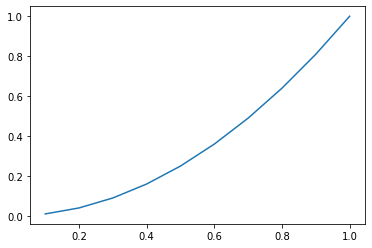

In [17]:
test = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
test2 = [i*i for i in test]
plt.plot(test,test2)